In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import time
import random
import heapq
import numpy as np


# Define the network topology

In [2]:
# Define the network topology
G = nx.Graph()
G.add_nodes_from(['A', 'B', 'C', 'D', 'E', 'F', 'G'])
G.add_edges_from([('A', 'B', {'weight': 5}), ('A', 'C', {'weight': 1}), ('B', 'D', {'weight': 2}),
                  ('B', 'E', {'weight': 3}), ('C', 'E', {'weight': 4}), ('C', 'F', {'weight': 6}),
                  ('D', 'E', {'weight': 1}), ('E', 'F', {'weight': 2}), ('E', 'G', {'weight': 7}),
                  ('F', 'G', {'weight': 1})])


# Implement RIP

In [3]:

def rip(G, source, target):
    distances = {node: float('inf') for node in G.nodes()}
    distances[source] = 0
    predecessors = {node: None for node in G.nodes()}

    while True:
        updated = False
        for u, v, data in G.edges(data=True):
            if distances[u] + data['weight'] < distances[v]:
                distances[v] = distances[u] + data['weight']
                predecessors[v] = u
                updated = True
        if not updated:
            break

    path = []
    node = target
    while node is not None:
        path.append(node)
        node = predecessors[node]
    path.reverse()
    return path


# Implement OSPF

In [4]:

def ospf(G, source, target):
    distances = {node: float('inf') for node in G.nodes()}
    distances[source] = 0
    predecessors = {node: None for node in G.nodes()}
    pq = [(0, source)]

    while pq:
        d, u = heapq.heappop(pq)
        if d > distances[u]:
            continue
        for v, data in G[u].items():
            dist = distances[u] + data['weight']
            if dist < distances[v]:
                distances[v] = dist
                predecessors[v] = u
                heapq.heappush(pq, (dist, v))

    path = []
    node = target
    while node is not None:
        path.append(node)
        node = predecessors[node]
    path.reverse()
    return path


# Test bench for convergence time

In [19]:
protocols = ['RIP', 'OSPF']
times = {protocol: [] for protocol in protocols}

def test_convergence_time():
    print("Testing convergence time...")
    for _ in range(10):  # Run the routing protocol 10 times
        source, target = random.sample(list(G.nodes()), 2)
        start_time = time.time()
        rip_path = rip(G, source, target)
        rip_time = time.time() - start_time
        start_time = time.time()
        ospf_path = ospf(G, source, target)
        ospf_time = time.time() - start_time
        start_time = time.time()
        times['RIP'].append(rip_time)
        times['OSPF'].append(ospf_time)

    # Calculate average times
    avg_times = {protocol: np.mean(times[protocol]) for protocol in protocols}

    # Print average times
    for protocol in protocols:
        print(f"Average {protocol} convergence time: {avg_times[protocol]:.6f} seconds")

    # Plotting
    x = np.arange(len(protocols))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, [avg_times[protocol] for protocol in protocols], width, label='Mean Time')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Time Taken (s)')
    ax.set_title('Convergence Time Analysis')
    ax.set_xticks(x)
    ax.set_xticklabels(protocols)
    ax.legend()

    fig.tight_layout()

    plt.show()

Testing convergence time...
Average RIP convergence time: 0.000008 seconds
Average OSPF convergence time: 0.000006 seconds


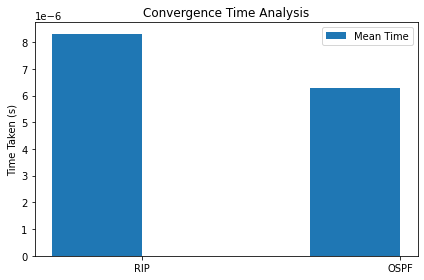

In [20]:
test_convergence_time()

# Test bench for scalability

In [7]:
# Initialize lists to store data for plotting
protocols = ['RIP', 'OSPF']
nodes = [10, 50, 100, 500, 1000, 2000, 4000, 6000, 8000, 10000]
times = {protocol: [] for protocol in protocols}

def test_scalability():
    print("Testing scalability...")
    for n in nodes:  # Use the 'nodes' list here
        G = nx.erdos_renyi_graph(n, 0.1)
        while not nx.is_connected(G):
            G = nx.erdos_renyi_graph(n, 0.1)
        # Add 'weight' attribute to the edges
        for u, v, d in G.edges(data=True):
            d['weight'] = random.randint(1, 10)
        source, target = random.sample(list(G.nodes()), 2)
        start_time = time.time()
        rip_path = rip(G, source, target)
        rip_time = time.time() - start_time
        times['RIP'].append(rip_time)
        start_time = time.time()
        ospf_path = ospf(G, source, target)
        ospf_time = time.time() - start_time
        times['OSPF'].append(ospf_time)
        start_time = time.time()
        print(f"For a network of {n} nodes:")
        print(f"RIP convergence time: {rip_time:.6f} seconds")
        print(f"OSPF convergence time: {ospf_time:.6f} seconds")

    # Plotting should be outside the loop
    plt.figure(figsize=(10, 6))
    line_styles = ['-', '--']
    for i, protocol in enumerate(protocols):
        plt.plot(nodes, times[protocol], line_styles[i], label=protocol)

    plt.xlabel('Number of Nodes')
    plt.ylabel('Time Taken (s)')
    plt.title('Scalability Testing')
    plt.legend()
    plt.grid(True, which="both", ls="--", linewidth=0.5)
    plt.xscale('log')

    plt.show()

Testing scalability...
For a network of 10 nodes:
RIP convergence time: 0.000011 seconds
OSPF convergence time: 0.000025 seconds
For a network of 50 nodes:
RIP convergence time: 0.000071 seconds
OSPF convergence time: 0.000096 seconds
For a network of 100 nodes:
RIP convergence time: 0.000227 seconds
OSPF convergence time: 0.000290 seconds
For a network of 500 nodes:
RIP convergence time: 0.005391 seconds
OSPF convergence time: 0.005615 seconds
For a network of 1000 nodes:
RIP convergence time: 0.021621 seconds
OSPF convergence time: 0.019522 seconds
For a network of 2000 nodes:
RIP convergence time: 0.083876 seconds
OSPF convergence time: 0.078499 seconds
For a network of 4000 nodes:
RIP convergence time: 0.333753 seconds
OSPF convergence time: 0.318298 seconds
For a network of 6000 nodes:
RIP convergence time: 0.792399 seconds
OSPF convergence time: 0.774510 seconds
For a network of 8000 nodes:
RIP convergence time: 1.479752 seconds
OSPF convergence time: 1.330436 seconds
For a netwo

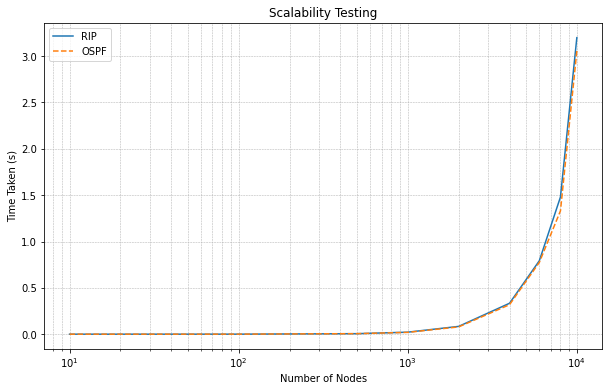

In [8]:
test_scalability()

# Test bench for load balancing

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import random

def test_load_balancing():
    load_values = [10, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
    rip_variances = []
    ospf_variances = []

    for load in load_values:
        print(f"Testing load balancing for load = {load}...")
        rip_traffic = {edge: 0 for edge in G.edges()}
        ospf_traffic = {edge: 0 for edge in G.edges()}
        # Add reverse edges
        for u, v in G.edges():
            rip_traffic[(v, u)] = 0
            ospf_traffic[(v, u)] = 0

        for _ in range(load):
            source, target = random.sample(list(G.nodes()), 2)
            rip_path = rip(G, source, target)
            for i in range(len(rip_path) - 1):
                u, v = rip_path[i], rip_path[i+1]
                rip_traffic[(u, v)] += 1
                rip_traffic[(v, u)] += 1

            ospf_path = ospf(G, source, target)
            for i in range(len(ospf_path) - 1):
                u, v = ospf_path[i], ospf_path[i+1]
                ospf_traffic[(u, v)] += 1
                ospf_traffic[(v, u)] += 1


        rip_variances.append(np.var(list(rip_traffic.values())))
        ospf_variances.append(np.var(list(ospf_traffic.values())))

        print("RIP variance:", rip_variances[-1])
        print("OSPF variance:", ospf_variances[-1])

    plt.plot(load_values, rip_variances, label='RIP')
    plt.plot(load_values, ospf_variances, label='OSPF')
    plt.xlabel('Load')
    plt.ylabel('Variance')
    plt.legend()
    plt.show()

Testing load balancing for load = 10...
RIP variance: 0.45
OSPF variance: 1.4
Testing load balancing for load = 50...
RIP variance: 6.24
OSPF variance: 30.809999999999995
Testing load balancing for load = 100...
RIP variance: 16.439999999999998
OSPF variance: 88.84
Testing load balancing for load = 150...
RIP variance: 55.040000000000006
OSPF variance: 276.68999999999994
Testing load balancing for load = 200...
RIP variance: 56.29
OSPF variance: 382.2
Testing load balancing for load = 250...
RIP variance: 115.6
OSPF variance: 538.2
Testing load balancing for load = 300...
RIP variance: 211.81
OSPF variance: 922.9599999999998
Testing load balancing for load = 350...
RIP variance: 323.2099999999999
OSPF variance: 1341.29
Testing load balancing for load = 400...
RIP variance: 241.89000000000004
OSPF variance: 1473.8
Testing load balancing for load = 450...
RIP variance: 327.8
OSPF variance: 1652.8
Testing load balancing for load = 500...
RIP variance: 432.00999999999993
OSPF variance: 208

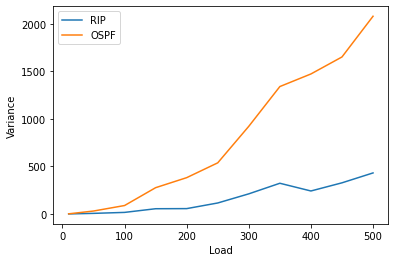

In [10]:
test_load_balancing()

# Test bench for resilience to network changes

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def test_resilience():
    if len(G.edges()) == 0:
        print("The graph has no edges.")
        return

    rip_changes_list = []
    ospf_changes_list = []

    for _ in range(10):
        rip_paths = {}
        ospf_paths = {}

        for source in G.nodes():
            for target in G.nodes():
                if source != target:
                    rip_paths[(source, target)] = rip(G, source, target)
                    ospf_paths[(source, target)] = ospf(G, source, target)

        failed_link = random.sample(list(G.edges()), 1)[0]
        G.remove_edge(*failed_link)

        rip_changes = 0
        ospf_changes = 0

        for source, target in rip_paths:
            new_rip_path = rip(G, source, target)
            if new_rip_path != rip_paths[(source, target)]:
                rip_changes += 1

        for source, target in ospf_paths:
            new_ospf_path = ospf(G, source, target)
            if new_ospf_path != ospf_paths[(source, target)]:
                ospf_changes += 1


        rip_changes_list.append(rip_changes)
        ospf_changes_list.append(ospf_changes)

    protocols = ['RIP', 'OSPF']
    means = [np.mean(rip_changes_list), np.mean(ospf_changes_list)]
    variances = [np.var(rip_changes_list), np.var(ospf_changes_list)]

    x = np.arange(len(protocols))
    width = 0.35

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, means, width, label='Mean')
    rects2 = ax.bar(x + width/2, variances, width, label='Variance')

    ax.set_ylabel('Values')
    ax.set_title('Mean and Variance of Path Changes')
    ax.set_xticks(x)
    ax.set_xticklabels(protocols)
    ax.legend()
    # Set the limits of the y-axis
    ax.set_ylim([0, max(max(means), max(variances)) * 1.1])
    fig.tight_layout()
    plt.show()

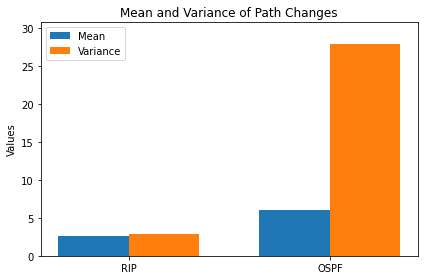

In [12]:
test_resilience()